# Sentiment analysis with nlp 

In [2]:
# importing libraries 


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
# imprt regualr expression library
import re

In [5]:
# import ml library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# import nlp libraries 
import nltk
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords # --> removes common words like ( is , the ,was)
from nltk.stem import PorterStemmer #--> changes word to it's root form eg('playing' --> 'play')

In [7]:
df = pd.read_csv('IMDB Dataset.csv')

In [8]:
df['sentiment'] = df['sentiment'].map({'positive':1,'negative':0})

# download nltk pacakges

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\udhaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udhaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# text pre processing 

In [12]:
stop_words = set(stopwords.words('english'))

In [13]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [205]:
len(stop_words)

198

In [14]:
stemmer = PorterStemmer()

In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text) # removes punctuations 
    words = word_tokenize(text)
    filtered_words = []
    for w in words:
        if w.isalpha() and w not in stop_words:
            filtered_words.append(stemmer.stem(w))
    return ' '.join(filtered_words)
    


# now appying above function in review columns

In [17]:

df['review'] = df['review'].apply(clean_text)

In [36]:
x = df['review']
y = df['sentiment']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# now using TFID - vectorizer

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
tfidf = TfidfVectorizer(max_features=5000)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

# Logistic regression 

In [151]:
model = LogisticRegression(max_iter = 10000000000)
model.fit(x_train_tfidf,y_train)
y_predict = model.predict(x_test_tfidf)

In [184]:
# accuracy_score
print(accuracy_score(y_predict,y_test))

0.8853


In [186]:
# confusion_matrix
print('confusion matrix',confusion_matrix(y_predict,y_test))

confusion matrix [[4306  492]
 [ 655 4547]]


In [188]:
# calssification_report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4798
           1       0.90      0.87      0.89      5202

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [157]:
y_predict.shape

(10000,)

# visualization 

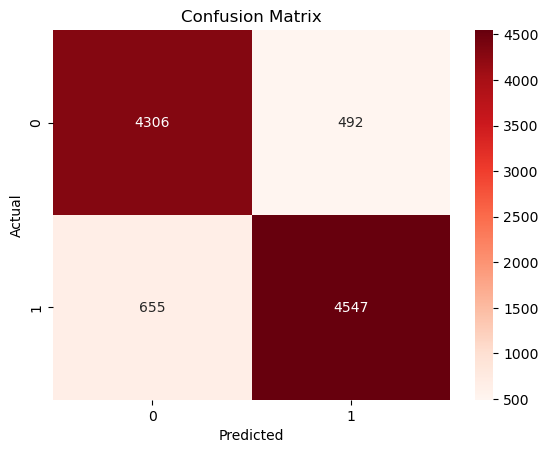

In [195]:
conf_matrix = confusion_matrix(y_predict,y_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

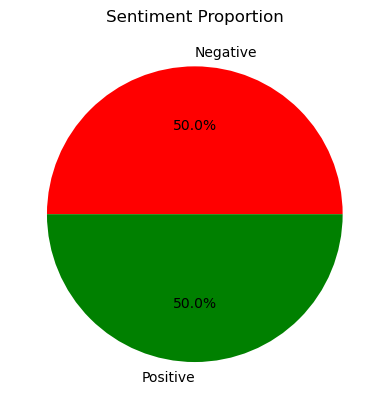

In [197]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Negative', 'Positive'], colors=['red', 'green'])
plt.title("Sentiment Proportion")
plt.ylabel("")  # Hides the y-label
plt.show()


# lets test with unseen data 

In [172]:
new_review = 'The Midnight Library" is a hauntingly beautiful film that blends fantasy with deep philosophical themes. The story follows Nora, a woman stuck in despair, who finds herself in a mysterious library where each book represents a different life she could have lived. The cinematography is stunning, with dreamlike visuals that capture the surreal transitions between worlds. Carey Mulligan delivers a powerful performance as Nora, effortlessly portraying the emotional weight of regret, hope, and rediscovery. The pacing is slow at times, but it allows the emotional beats to land more effectively. Overall, "The Midnight Library" is a thought-provoking journey that stays with you long after the credits roll.'

In [174]:
print(type(new_review))

<class 'str'>


In [176]:
processed_text = clean_text(new_review)
new_review_tfdif = tfidf.transform([processed_text]) # here we should provide new processed text in list form only

In [178]:
new_pred = model.predict(new_review_tfdif)

In [180]:

if new_pred[0] == 1:
    print("Sentiment: Positive 😊")
else:
    print("Sentiment: Negative 😞")

Sentiment: Positive 😊
